Data collection complete. Dataset shape: (120, 9)

Sample of the collected data:
   year  round                 race        circuit    driver constructor  \
0  2020      1  Austrian Grand Prix  Red Bull Ring    Bottas    Mercedes   
1  2020      1  Austrian Grand Prix  Red Bull Ring   Leclerc     Ferrari   
2  2020      1  Austrian Grand Prix  Red Bull Ring    Norris     McLaren   
3  2020      1  Austrian Grand Prix  Red Bull Ring  Hamilton    Mercedes   
4  2020      1  Austrian Grand Prix  Red Bull Ring     Sainz     McLaren   

   grid  position  points  
0     1         1    25.0  
1     7         2    18.0  
2     3         3    16.0  
3     5         4    12.0  
4     8         5    10.0  


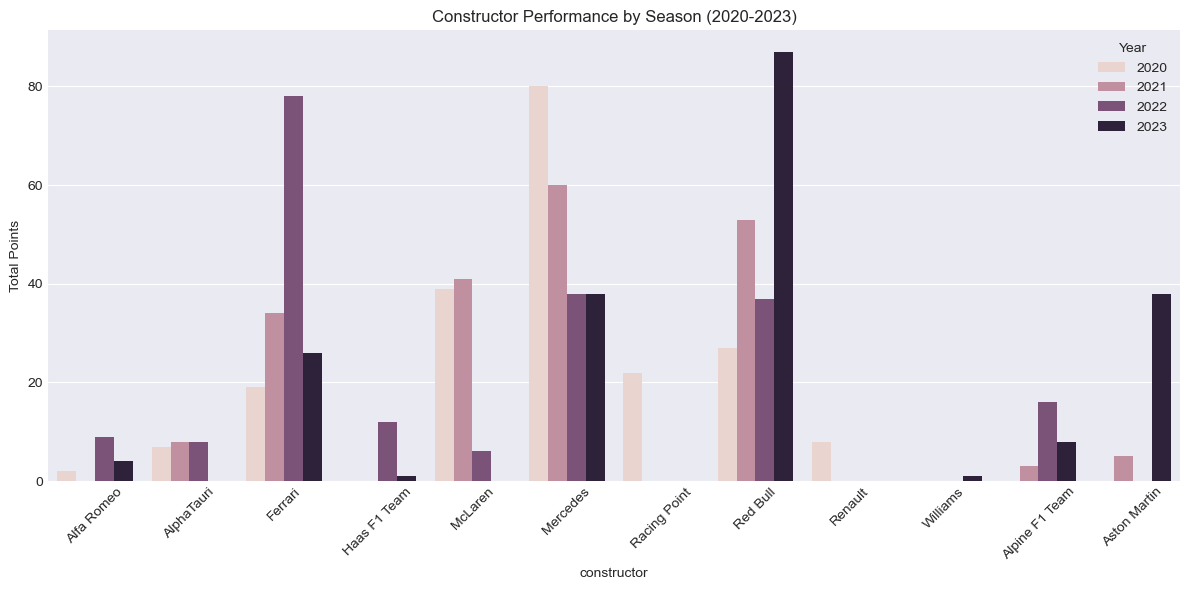

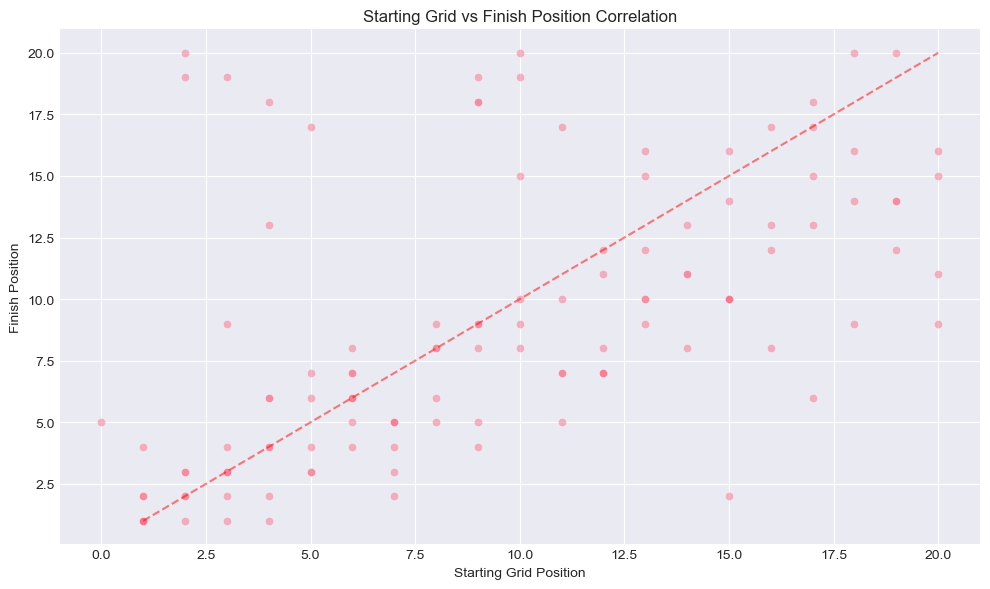

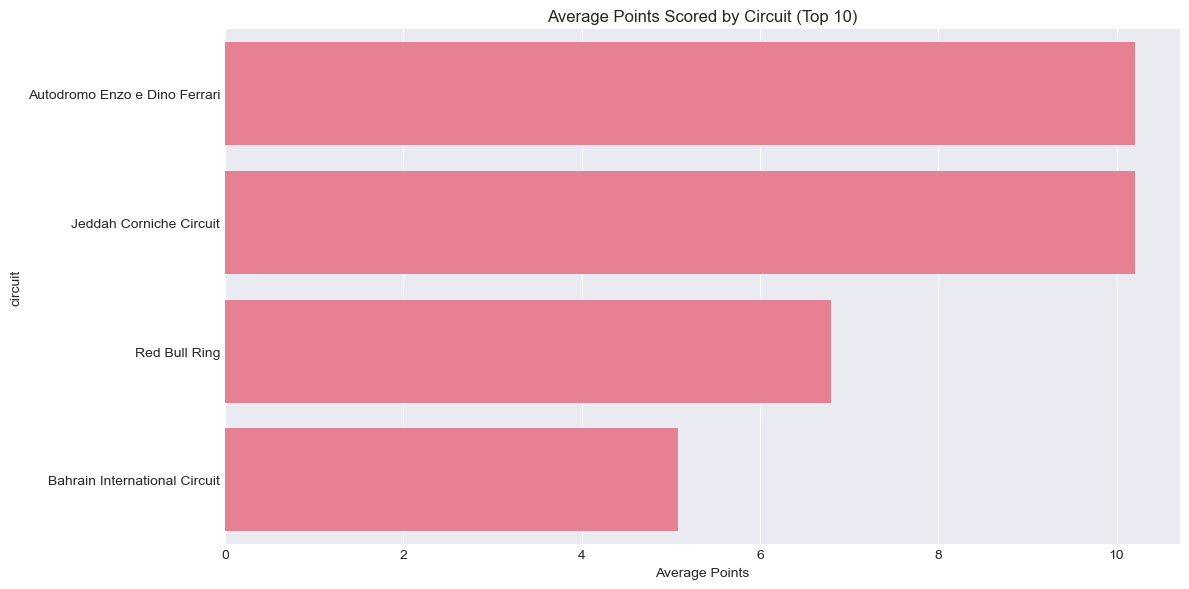

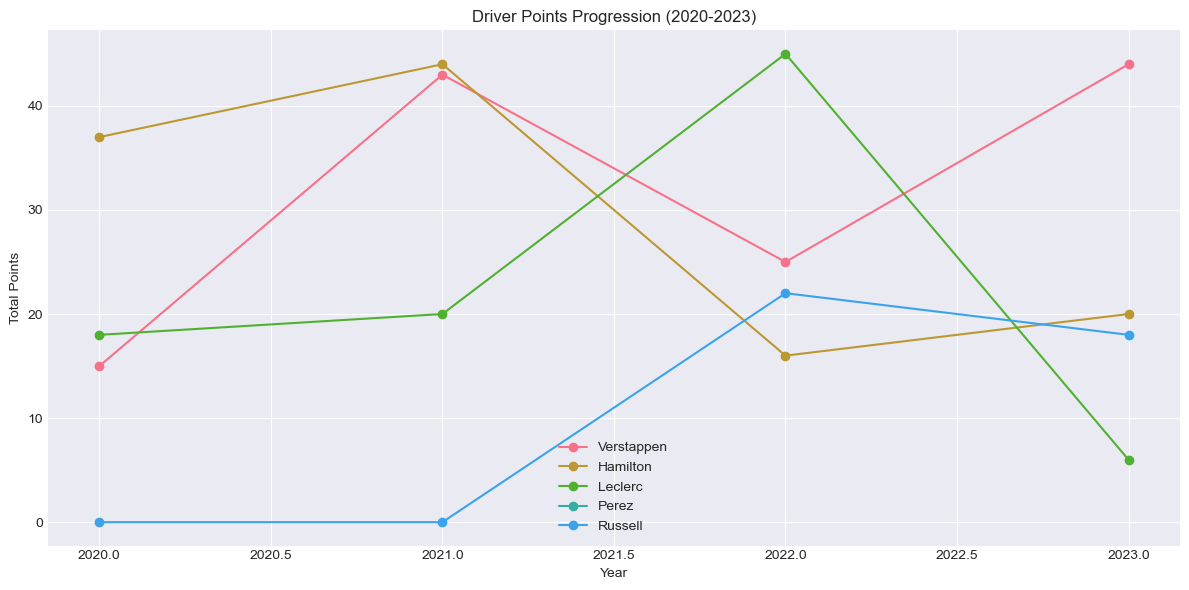


Key Statistics:

Most Successful Constructors by Year:
    year constructor  points
5   2020    Mercedes    80.0
17  2021    Mercedes    60.0
24  2022     Ferrari    78.0
38  2023    Red Bull    87.0

Average Grid to Finish Position Change for Selected Drivers:
driver
de Vries      5.0
Tsunoda       5.0
Giovinazzi    4.5
Sargeant      4.0
Latifi        4.0
Name: position_change, dtype: float64


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Function to get F1 race results for a specific year
def get_race_results(year):
    url = "http://ergast.com/api/f1/" + str(year) + "/results.json"
    response = requests.get(url)
    data = response.json()
    
    races = []
    for race in data['MRData']['RaceTable']['Races']:
        race_name = race['raceName']
        circuit = race['Circuit']['circuitName']
        round_num = race['round']
        
        for result in race['Results']:
            driver = result['Driver']['familyName']
            constructor = result['Constructor']['name']
            position = result['position']
            grid = result['grid']
            if 'points' in result:
                points = result['points']
            else:
                points = 0
            races.append({
                'year': year,
                'round': int(round_num),
                'race': race_name,
                'circuit': circuit,
                'driver': driver,
                'constructor': constructor,
                'grid': int(grid),
                'position': int(position),
                'points': float(points)
            })
    return pd.DataFrame(races)

# Collect race results for the seasons 2020-2023
years = range(2020, 2024)
all_results = pd.concat([get_race_results(year) for year in years])
print("Data collection complete. Dataset shape:", all_results.shape)
print("\nSample of the collected data:")
print(all_results.head())

# ---------------- Visualization 1: Constructor Performance by Season ----------------
constructor_points = all_results.groupby(['year', 'constructor'])['points'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=constructor_points, x='constructor', y='points', hue='year')
plt.title('Constructor Performance by Season (2020-2023)')
plt.xticks(rotation=45)
plt.ylabel('Total Points')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

# ---------------- Visualization 2: Grid vs Finish Position Correlation ----------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_results, x='grid', y='position', alpha=0.5)
plt.title('Starting Grid vs Finish Position Correlation')
plt.xlabel('Starting Grid Position')
plt.ylabel('Finish Position')
plt.plot([1, 20], [1, 20], '--', color='red', alpha=0.5)  
plt.tight_layout()
plt.show()

# ---------------- Visualization 3: Points Distribution by Circuit ----------------
circuit_points = all_results.groupby('circuit')['points'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=circuit_points.values, y=circuit_points.index)
plt.title('Average Points Scored by Circuit (Top 10)')
plt.xlabel('Average Points')
plt.tight_layout()
plt.show()

# ---------------- Visualization 4: Driver Points Progression ----------------
driver_progression = all_results.groupby(['year', 'driver'])['points'].sum().reset_index()
plt.figure(figsize=(12, 6))
top_drivers = ['Verstappen', 'Hamilton', 'Leclerc', 'Perez', 'Russell']
for driver in top_drivers:
    driver_data = driver_progression[driver_progression['driver'] == driver]
    plt.plot(driver_data['year'], driver_data['points'], marker='o', label=driver)
plt.title('Driver Points Progression (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.legend()
plt.tight_layout()
plt.show()

# ---------------- Key Statistics ----------------
print("\nKey Statistics:")

# Most Successful Constructors by Year
constructor_winners = constructor_points.loc[constructor_points.groupby('year')['points'].idxmax()]
print("\nMost Successful Constructors by Year:")
print(constructor_winners[['year', 'constructor', 'points']])

# Average Grid to Finish Position Change for drivers
all_results['position_change'] = all_results['grid'] - all_results['position']
driver_position_change = all_results.groupby('driver')['position_change'].mean().sort_values(ascending=False).head()
print("\nAverage Grid to Finish Position Change for Selected Drivers:")
print(driver_position_change)